In [1]:
import os
import pickle
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from multiprocessing import Pool, TimeoutError

from tokenizers import BertWordPieceTokenizer

plt.rcParams['figure.dpi'] = 120

In [2]:
full_ocr_path = os.path.join('..', 'data', 'ocr', 'full', 'combined_ocr.pickle')
full_gs_path = os.path.join('..', 'data', 'ocr', 'full', 'combined_gs.pickle')
data_path = os.path.join('..', 'data', 'ocr', 'full')

def read_ocr_file(file_path: str):
    with open(file_path, 'r', encoding='utf-8') as language_file:
        text_data: List[str] = language_file.read().split('\n')

        return(text_data[1][start_position:], text_data[2][start_position:])

def save_data_files():
    start_position = 14

    ocr_aligned_lengths = []
    gs_aligned_lengths = []
    file_paths = []

    for i, file_name in enumerate(os.listdir(data_path)):
        file_paths.append(os.path.join(data_path, file_name))

    number_of_files = len(file_paths)
    file_data = []
    for i, file_path in enumerate(file_paths):
        print(f'{i}/{number_of_files}             \r', end='')
        file_data.append(read_ocr_file(file_path))
        
    ocr_file_data = [x[0] for x in file_data]
    gs_file_data = [x[1] for x in file_data]
    
    with open(full_ocr_path, 'wb') as ocr_handle:
        pickle.dump(ocr_file_data, ocr_handle, protocol=-1)
    
    with open(full_gs_path, 'wb') as gs_handle:
        pickle.dump(gs_file_data, gs_handle, protocol=-1)
        
    return ocr_file_data, gs_file_data

if not os.path.exists(full_ocr_path) or not os.path.exists(full_gs_path):
    ocr_file_data, gs_file_data = save_data_files()
else:
    with open(full_ocr_path, 'rb') as ocr_handle:
        ocr_file_data = pickle.load(ocr_handle)
    
    with open(full_gs_path, 'rb') as gs_handle:
        gs_file_data = pickle.load(gs_handle)

In [3]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

def plot_list_histogram(lst, title: str):
    labels, values = zip(*Counter(lst).items())
    indexes = np.arange(len(labels))
    width = 1

    plt.bar(indexes, values, width)
    plt.title(title)

    plt.show()
    
def print_statistics(lst, title:str):
    max_value = np.max(lst)
    min_value = np.min(lst)
    avg_value = np.mean(lst)
    
    print(f'{title}:\nMAX: {max_value}\nMIN: {min_value}\nAVG: {avg_value}')


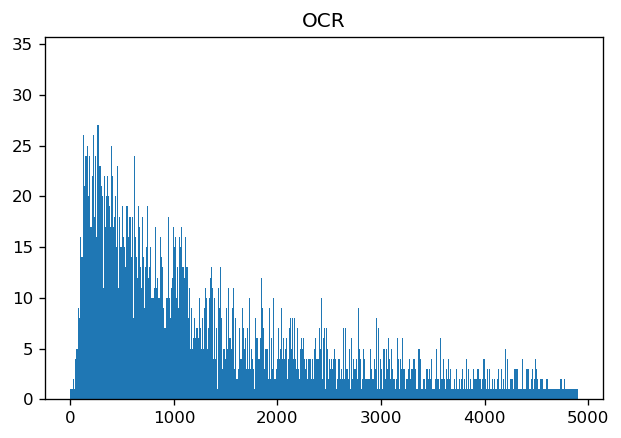

OCR:
MAX: 869252
MIN: 1
AVG: 2026.092451744855


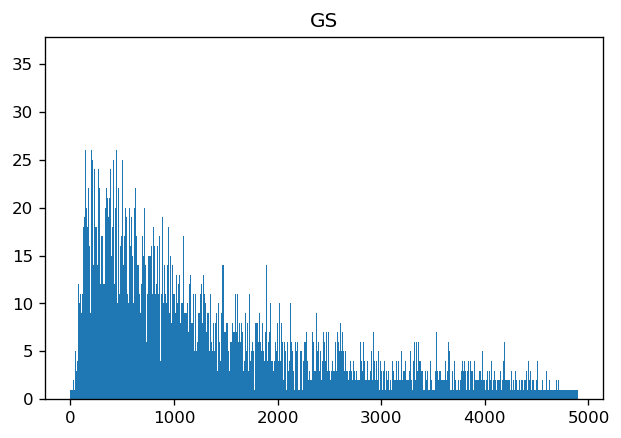

GS:
MAX: 839062
MIN: 0
AVG: 2022.2069538540202


In [15]:
ocr_file_data.sort(key=len)
gs_file_data.sort(key=len)

ocr_lengths = np.array([len(x) for x in ocr_file_data])
gs_lengths = np.array([len(x) for x in gs_file_data])

plot_list_histogram(ocr_lengths, 'OCR')
print_statistics(ocr_lengths, 'OCR')

plot_list_histogram(gs_lengths, 'GS')
print_statistics(gs_lengths, 'GS')

In [29]:
full_ocr_tokens_path = os.path.join('..', 'data', 'ocr', 'full', 'combined_ocr_tokens.pickle')
full_gs_tokens_path = os.path.join('..', 'data', 'ocr', 'full', 'combined_gs_tokens.pickle')

vocab_path = os.path.join('..', 'data', 'vocabularies', 'bert-base-cased-vocab.txt')
tokenizer = BertWordPieceTokenizer(vocab_path)

if not os.path.exists(full_ocr_tokens_path) or not os.path.exists(full_gs_tokens_path):        
    ocr_tokens = [tokenizer.encode(x).ids for x in ocr_file_data]
    gs_tokens = [tokenizer.encode(x).ids for x in gs_file_data]
    
    with open(full_ocr_tokens_path, 'wb') as ocr_handle:
        pickle.dump(ocr_tokens, ocr_handle, protocol=-1)
    
    with open(full_gs_tokens_path, 'wb') as gs_handle:
        pickle.dump(gs_tokens, gs_handle, protocol=-1)
else:
    with open(full_ocr_tokens_path, 'rb') as ocr_handle:
        ocr_tokens = pickle.load(ocr_handle)
    
    with open(full_gs_tokens_path, 'rb') as gs_handle:
        gs_tokens = pickle.load(gs_handle)

OCR - Less than 2000 length: 99.55579700882015
GS  - Less than 2000 length: 99.69321232263837


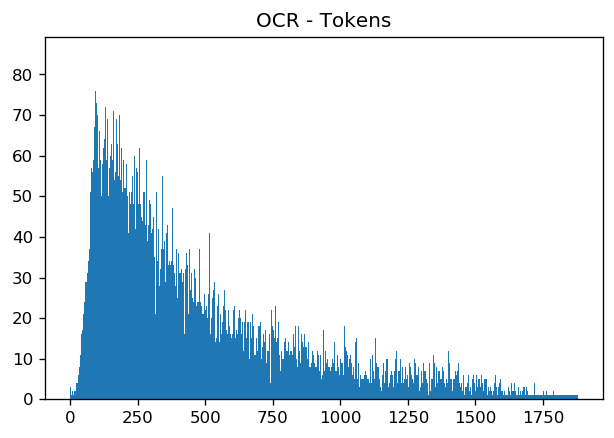

OCR - Tokens:
MAX: 217063
MIN: 3
AVG: 647.2373769653585


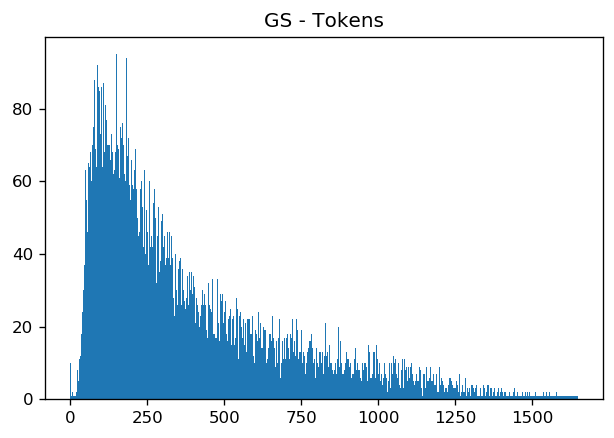

GS - Tokens:
MAX: 206645
MIN: 2
AVG: 530.3896842643487


In [28]:
ocr_tokens.sort(key=len)
gs_tokens.sort(key=len)

ocr_tokens_lengths = np.array([len(x) for x in ocr_tokens])
gs_tokens_lengths = np.array([len(x) for x in gs_tokens])
print(f'OCR - Less than 2000 length: {len(ocr_tokens_lengths[ocr_tokens_lengths <= 2000]) / len(ocr_tokens_lengths) * 100}')
print(f'GS  - Less than 2000 length: {len(gs_tokens_lengths[gs_tokens_lengths <= 2000]) / len(gs_tokens_lengths) * 100}')

plot_list_histogram(ocr_tokens_lengths, 'OCR - Tokens')
print_statistics(ocr_tokens_lengths, 'OCR - Tokens')

plot_list_histogram(gs_tokens_lengths, 'GS - Tokens')
print_statistics(gs_tokens_lengths, 'GS - Tokens')

In [31]:
print([tokenizer.id_to_token(x) for x in ocr_tokens[10000]])

['[CLS]', 'experiment', 'farm', '.', 'i', 'to', 'the', 'e', '##pt', '##tor', 'of', 'the', 'her', '##ald', '.', '^', '^', 'sir', '-', 'lo', 'j', '##ns', '##k', '##c', 'the', 'mat', '##te', '##i', 'c', '##lon', '##r', 'as', 'to', 'w', '##n', '*', 'i', 'hi', '##e', 'tablet', 'elected', 'l', '##ind', 'unveiled', 'j', '##ost', '##cid', '##av', 'm', 'the', 'go', '##ve', '##ino', '##r', '-', 'q', '##c', '##ne', '##ial', 'at', 'pan', '##au', '##ia', '##tti', '##i', 'e', '##om', 'me', '##mor', '##ai', '##es', 'i', 'stated', 'in', 'my', 'address', 't', '##nai', 'got', '##ern', '##oi', 'p', '##hill', '##ip', 'in', 'no', '##ve', '##mbe', '##i', ',', 'it', '##f', '##co', 'in', 'e', '##ider', 'to', 'l', '##ind', 'out', 'how', 'j', '##ong', 'it', 'would', 'take', 'a', 'man', '*', '«', 'cult', '##ivate', 'sufficient', 'land', 'so', 'as', 'to', 'be', 'able', 'i', '##o', 'su', '##pp', '##oit', 'h', '##ll', '##hs', '##elf', ',', 'chose', 'an', 'in', '##dust', '##ilo', '##us', '5', '##nu', '##ns', 'man', 